In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import yfinance as yf
tw2330 = yf.download('2330.TW',start='2024-01-01',end='2024-06-01',auto_adjust=True)
tw2303 = yf.download('2303.TW',start='2024-01-01',end='2024-06-01',auto_adjust=True)
tw2454 = yf.download('2454.TW',start='2024-01-01',end='2024-06-01',auto_adjust=True)
tw2317 = yf.download('2317.TW',start='2024-01-01',end='2024-06-01',auto_adjust=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#tw2330_s = tw2330[()'Close''2330.TW')]  #也可以使用tuple來做
tw2330_s = tw2330['Close']['2330.TW']
tw2303_s = tw2303['Close']['2303.TW']
tw2454_s = tw2454['Close']['2454.TW']
tw2317_s = tw2317['Close']['2317.TW']

In [8]:
df_price = pd.DataFrame({"台積電":tw2330_s,"聯電":tw2303_s,"聯發科":tw2454_s,"鴻海":tw2317_s})
df_price

,台積電,聯電,聯發科,鴻海
Date,,,,
2024-01-02,593.0,51.900002,915.833191,102.375000
2024-01-03,578.0,50.599998,889.693176,101.887505
2024-01-04,580.0,50.799999,889.309875,101.400002
2024-01-05,576.0,50.799999,882.601685,101.400002
2024-01-08,583.0,50.500000,881.643372,98.962502
...,...,...,...,...
2024-05-27,869.0,56.599998,1231.425903,180.375000
2024-05-28,865.0,56.400002,1255.383545,180.862503
2024-05-29,857.0,55.900002,1236.217407,175.987503


In [12]:
#matrix
#必須是一樣數量與相同名稱的欄位與索引 才能做相關性計算
df_matrix = df_price.corr()

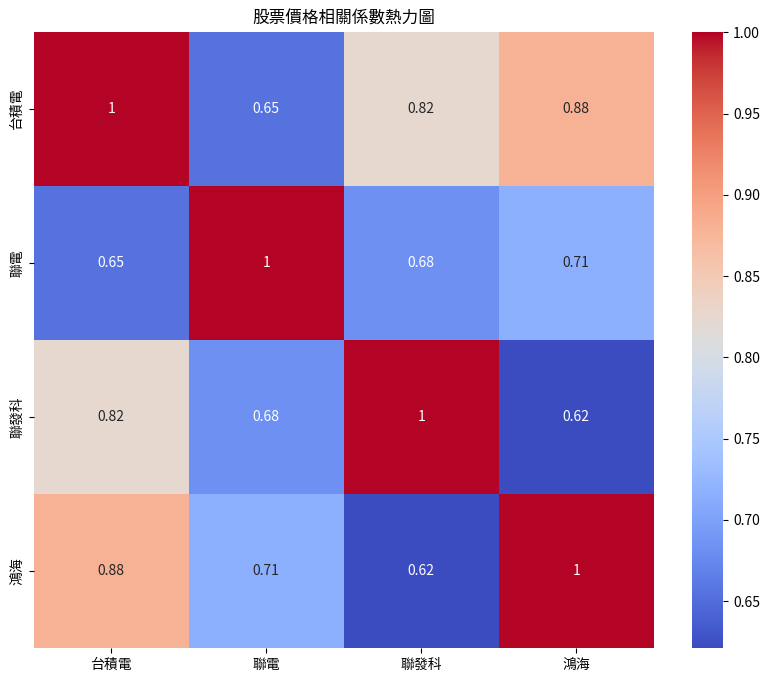

In [14]:
#seaborn heatmap
import seaborn as sns
from matplotlib.font_manager import fontManager
import matplotlib as mpl

fontManager.addfont('ChineseFont.ttf')
mpl.rc('font',family='ChineseFont')

figure = plt.figure(figsize=(10,8))
axes = figure.add_subplot(1,1,1)

sns.heatmap(df_matrix,annot=True,cmap='coolwarm',axes=axes)
axes.set_title('股票價格相關係數熱力圖')
plt.show()

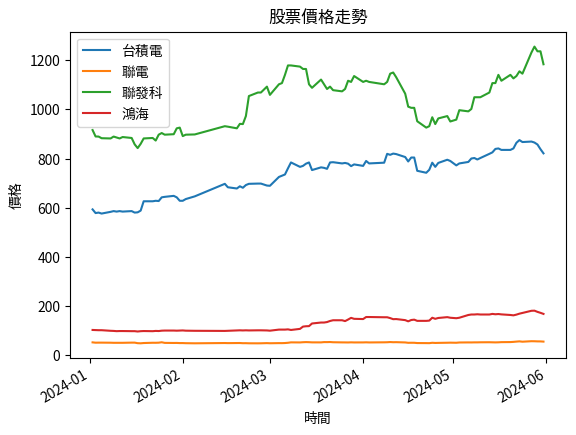

In [20]:
df_price.plot(title='股票價格走勢',xlabel='時間',ylabel='價格')
plt.show()

In [21]:
df_price.diff()

,台積電,聯電,聯發科,鴻海
Date,,,,
2024-01-02,NaN,NaN,NaN,NaN
2024-01-03,-15.0,-1.300003,-26.140015,-0.487495
2024-01-04,2.0,0.200001,-0.383301,-0.487503
2024-01-05,-4.0,0.000000,-6.708191,0.000000
2024-01-08,7.0,-0.299999,-0.958313,-2.437500
...,...,...,...,...
2024-05-27,2.0,2.000000,86.247803,8.774994
2024-05-28,-4.0,-0.199997,23.957642,0.487503
2024-05-29,-8.0,-0.500000,-19.166138,-4.875000


In [22]:
percent_df = df_price.pct_change()

In [23]:
formatted = percent_df.map(lambda x: f"{x:.2%}" if pd.notnull(x) else "")
formatted

,台積電,聯電,聯發科,鴻海
Date,,,,
2024-01-02,,,,
2024-01-03,-2.53%,-2.50%,-2.85%,-0.48%
2024-01-04,0.35%,0.40%,-0.04%,-0.48%
2024-01-05,-0.69%,0.00%,-0.75%,0.00%
2024-01-08,1.22%,-0.59%,-0.11%,-2.40%
...,...,...,...,...
2024-05-27,0.23%,3.66%,7.53%,5.11%
2024-05-28,-0.46%,-0.35%,1.95%,0.27%
2024-05-29,-0.92%,-0.89%,-1.53%,-2.70%
